In [1]:
# Khai báo thư viện
import numpy as np
from scipy.linalg import svd
from PIL import Image
import matplotlib.pyplot as plt
import cv2

In [2]:
# Các hàm sử dụng trong bài
def get_svd_size_k(U, S_diag, Vt, k):
    """
    Hàm tính toán Uk, Σk, VkT từ ma trận A và giữ lại k hàng/cột đầu tiên
    """
    # Giữ lại k hàng và k cột đầu tiên của ma trận Σ để tạo ra Σk
    Sigmak = np.diag(S_diag[:k])
    
    # Giữ lại k cột đầu tiên của ma trận U để tạo ra Uk
    Uk = U[:, :k]
    
    # 5. Giữ lại k hàng đầu tiên của ma trận Vt để tạo ra VkT
    VkT = Vt[:k, :]
    
    return Uk, Sigmak, VkT

def calculate_truncated_SVD(A, k):
    U, S_diag, Vt = svd(A)
    Uk, Sigmak, VkT = get_svd_size_k(U, S_diag, Vt, k)

    # Tính phần trăm lượng thông tin được giữ lại
    info_retained = np.sum(S_diag[0:k]**2)/np.sum(S_diag**2) * 100
    A_reconstructed = np.dot(Uk, np.dot(Sigmak, VkT))
    
    return A_reconstructed, info_retained

Before:


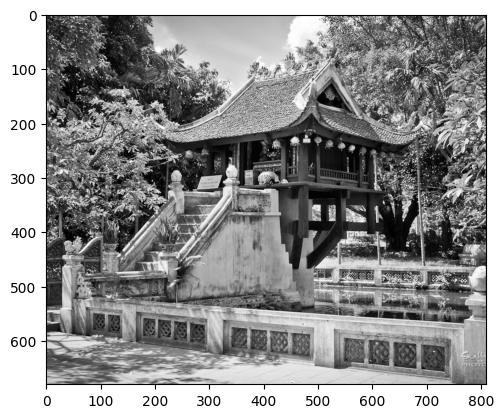

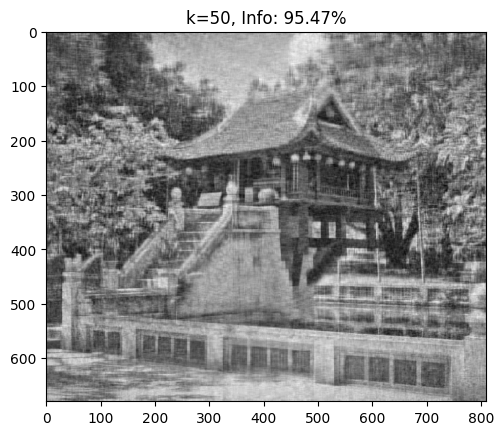

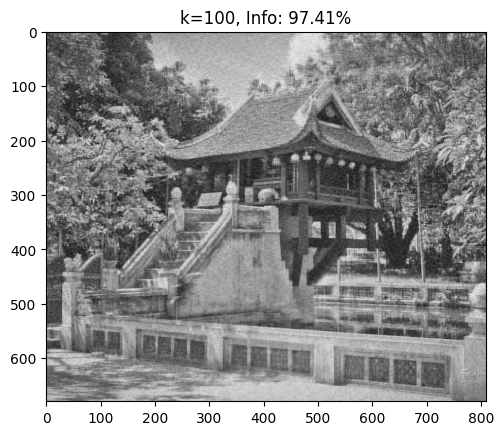

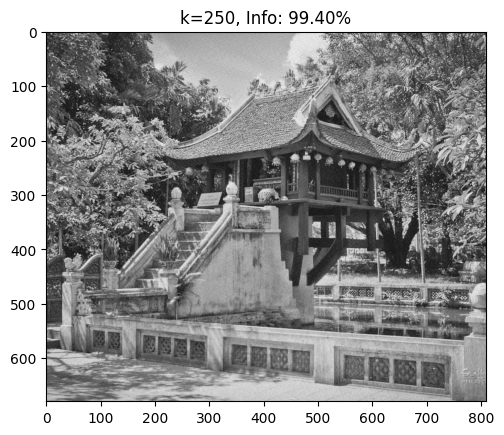

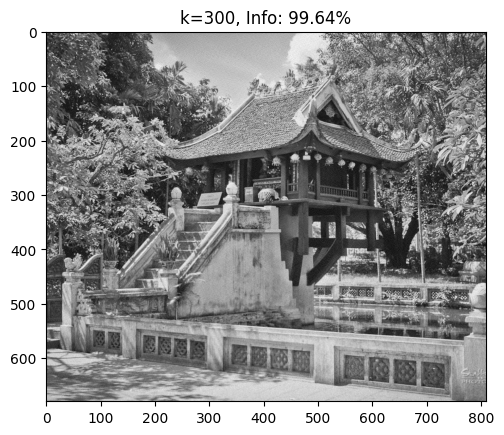

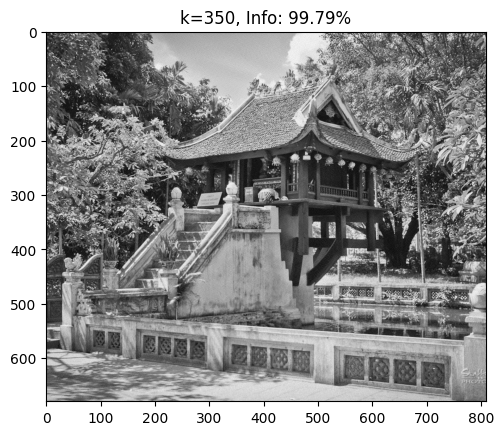

In [4]:
# Bài tập 5 (ảnh xám)

#Chuyển ảnh màu thành ảnh xám
A = np.array(Image.open('One_Pillar_Pagoda_Hanoi.jpg'))
A = A.dot([0.299, 0.5870, 0.114])

#Vẽ ảnh gốc
print('Before:')
plt.imshow(A, cmap = 'gray')
plt.show()

#Cho trước số lượng lambda cần giữ lại
k_list = [50, 100, 250, 300, 350]
for k in k_list:
    A_reconstructed, info_retained = calculate_truncated_SVD(A, k)

    #Vẽ ảnh
    plt.title(f"k={k}, Info: {info_retained:.2f}%")
    plt.imshow(A_reconstructed, cmap="gray")
    plt.show()


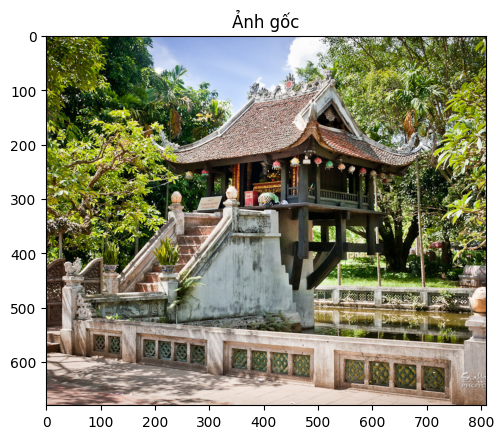

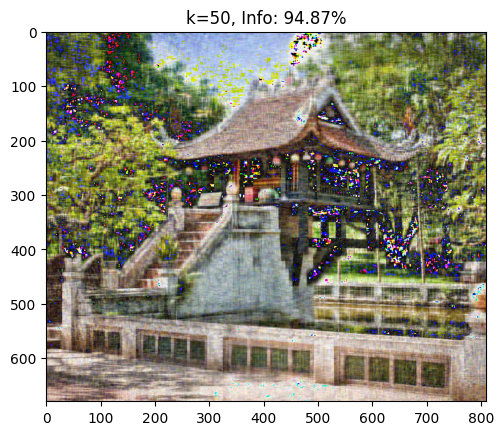

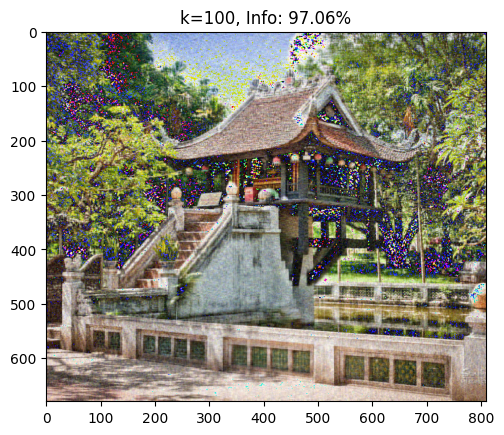

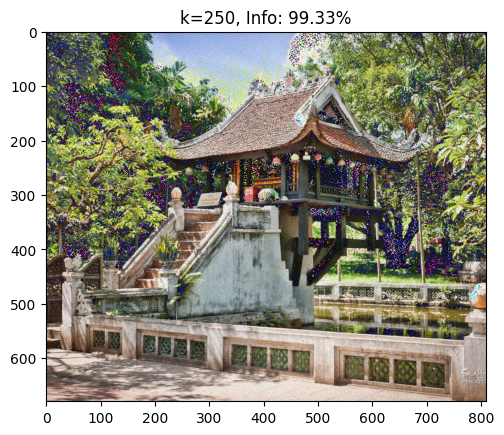

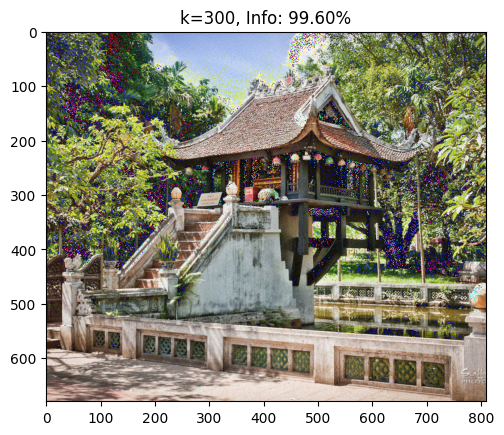

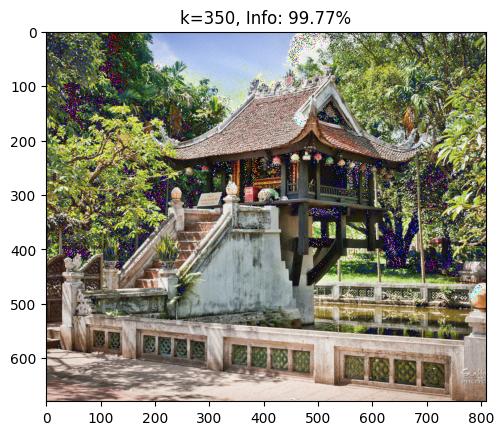

In [5]:
# Bài tập 5 (ảnh màu)

image = Image.open('One_Pillar_Pagoda_Hanoi.jpg')  
A = np.array(image)

# Tách ảnh thành ba kênh màu (R, G, B)
A_R = A[:, :,0]
A_G = A[:, :,1]
A_B = A[:, :,2]

plt.title('Ảnh gốc')
plt.imshow(A)
plt.show()
    
# Tìm truncated SVD của mỗi kênh màu với số λ lớn nhất được giữ lại
k_values = [50, 100, 250, 300, 350]  # Các giá trị lambda cần giữ lại

for k in k_values:
    # Truncated SVD cho từng kênh màu
    A_truncated_R, info_retained_R = calculate_truncated_SVD(A_R, k)
    A_truncated_G, info_retained_G = calculate_truncated_SVD(A_G, k)
    A_truncated_B, info_retained_B = calculate_truncated_SVD(A_B, k)
    
    # Tạo lại ảnh đã nén với 3 kênh màu
    A_truncated_color = np.stack([A_truncated_R, A_truncated_G, A_truncated_B], axis=-1).astype(np.uint8)
    
    # Lấy trung bình thông tin giữ lại của 3 kênh
    info_retained = (info_retained_R + info_retained_G + info_retained_B) / 3
    
    # Hiển thị kết quả
    plt.title(f"k={k}, Info: {info_retained:.2f}%")
    plt.imshow(A_truncated_color)
    plt.show()


In [6]:
# BTVN 6
# 1. Khởi tạo ma trận A và vector Y cấp 24 × 1
A_temp1 = np.loadtxt('phone_data.csv', delimiter=' ', usecols=(0, 1, 2))
A_temp2 = np.ones((A_temp1.shape[0], 1))
A = np.column_stack((A_temp1, A_temp2))
Y = np.loadtxt('phone_data.csv', delimiter=' ', usecols=(3))

# 2. Tính định thức của ma trận AtA
AtA = (A.T) @ A
det_AtA = np.linalg.det(AtA)

# Nếu định thức khác 0, ma trận X được tính bằng:
if det_AtA != 0:
    # Tính X = (A^T A)^-1 A^T Y
    X = np.linalg.inv(AtA) @ A.T @ Y
else:
    # Tìm SVD của ma trận A
    U, Σ, Vt = compute_SVD(A)
    
    # Tạo ma trận Σ+
    Σplus = np.zeros_like(A.T)
    for i in range(len(Σ)):
        if Σ[i] != 0:
            Σplus[i, i] = 1 / Σ[i]

    # Tính X = V Σ+ U^T Y
    X = Vt.T @ Σplus @ U.T @ Y

# 3. Tính giá điện thoại mới
omega = np.array([4, 64, 4000, 1])
price = X @ omega
print(f"Giá chiếc điện thoại mới: {price:.0f}")

Giá chiếc điện thoại mới: 4897997
